In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [4]:
df = pd.read_csv('seeds.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [10]:
df.head(100)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
95,18.72,16.34,0.8810,6.219,3.684,2.188,6.097,2
96,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,2
97,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2
98,19.46,16.50,0.8985,6.113,3.892,4.308,6.009,2


In [8]:
df['Type'].unique()

array([1, 2, 3])

In [9]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [12]:
t = df.corr()

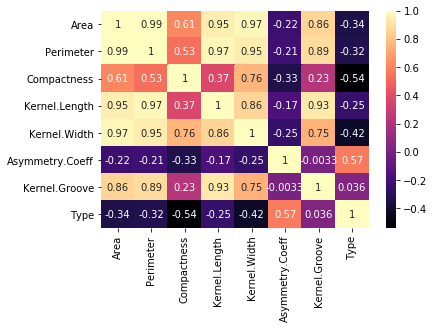

In [16]:
sns.heatmap(t, cmap='magma', annot=True)

In [31]:
df.head()

,Area,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,0.9034,5.658,3.562,1.355,5.175,1


In [63]:
px.scatter(df, x='Kernel.Width', y='Area', color='Type', trendline=True)

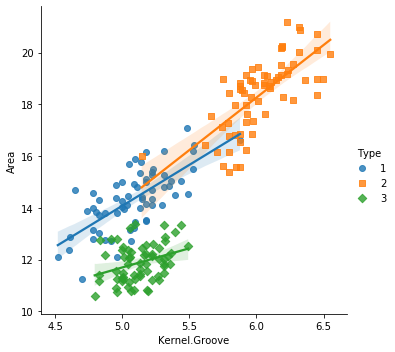

In [64]:
sns.lmplot(x='Kernel.Groove', y='Area', data=df, hue='Type', markers=['o','s','D'])
           

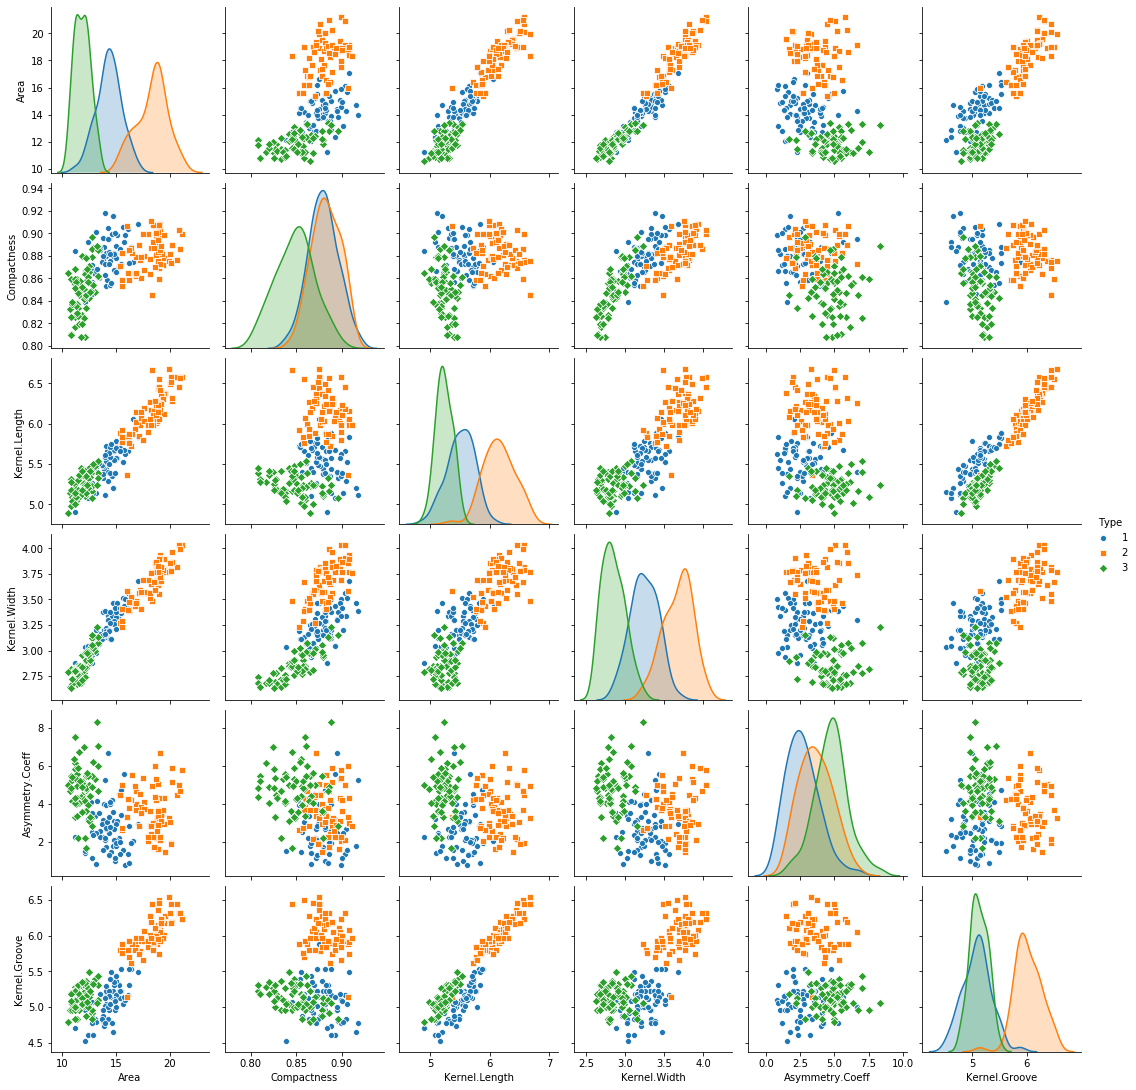

In [67]:
sns.pairplot( data=df, hue='Type', markers=['o','s','D'])

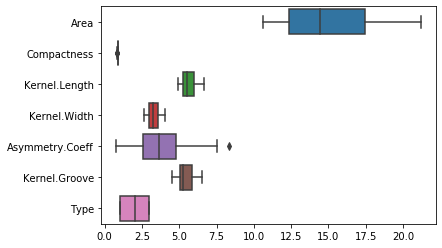

In [70]:
sns.boxplot(data=df, orient='h')

In [72]:
df.drop('Compactness', axis=1, inplace=True)

KeyError: "['Compactness'] not found in axis"

In [77]:
df.head()

,Area,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,5.763,3.312,2.221,5.220,1
1,14.88,5.554,3.333,1.018,4.956,1
2,14.29,5.291,3.337,2.699,4.825,1
3,13.84,5.324,3.379,2.259,4.805,1
4,16.14,5.658,3.562,1.355,5.175,1


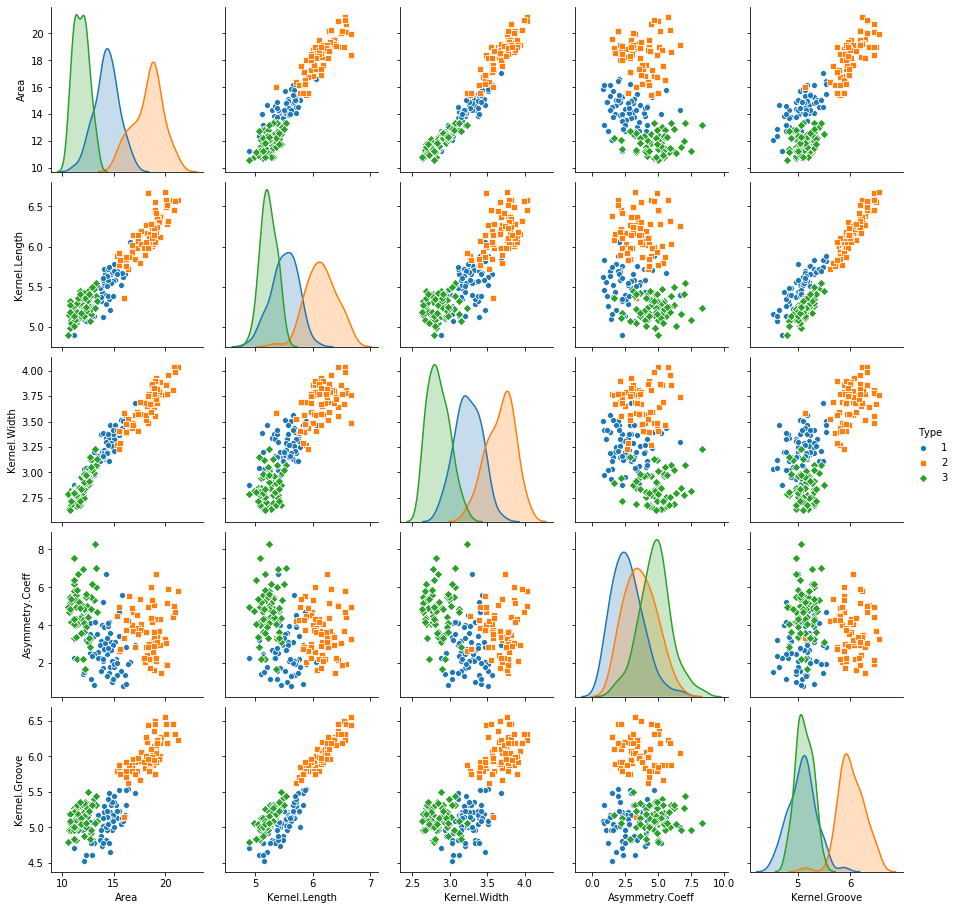

In [78]:
sns.pairplot( data=df, hue='Type', markers=['o','s','D'])

In [80]:
from sklearn.model_selection import train_test_split

In [95]:
Y = df['Type']

In [106]:
X = np.array(df)
Y = np.array(Y)

In [140]:
X_train,X_test, y_train, y_test = train_test_split(X, Y,  test_size = 0.3, random_state=42)
print(X_train.shape)

(139, 8)


In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn = KNeighborsClassifier(n_neighbors=3)

In [130]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [117]:
from sklearn import metrics

In [131]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [120]:
neighbors_settings = list(range(1, 31))
scores = []
for neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_predict))


In [122]:

import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=neighbors_settings, y=scores))
fig.show()

In [125]:
df = pd.read_csv('seeds.csv')
X = np.array(df)
Y = np.array(Y)

In [132]:
X_train,X_test, y_train, y_test = train_test_split(X, Y,  test_size = 0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [135]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


1.0


In [139]:
print(X_train.shape)

(139, 8)
